<a href="https://colab.research.google.com/github/aguilarmadeira/Optimization/blob/main/bisection_exemplo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estimated minimum at x = 3.0000

Iteration Results:
 Iteration   a  b   z  df(z)
         1 0.0  4 2.0   -3.0
         2 2.0  4 3.0    0.0


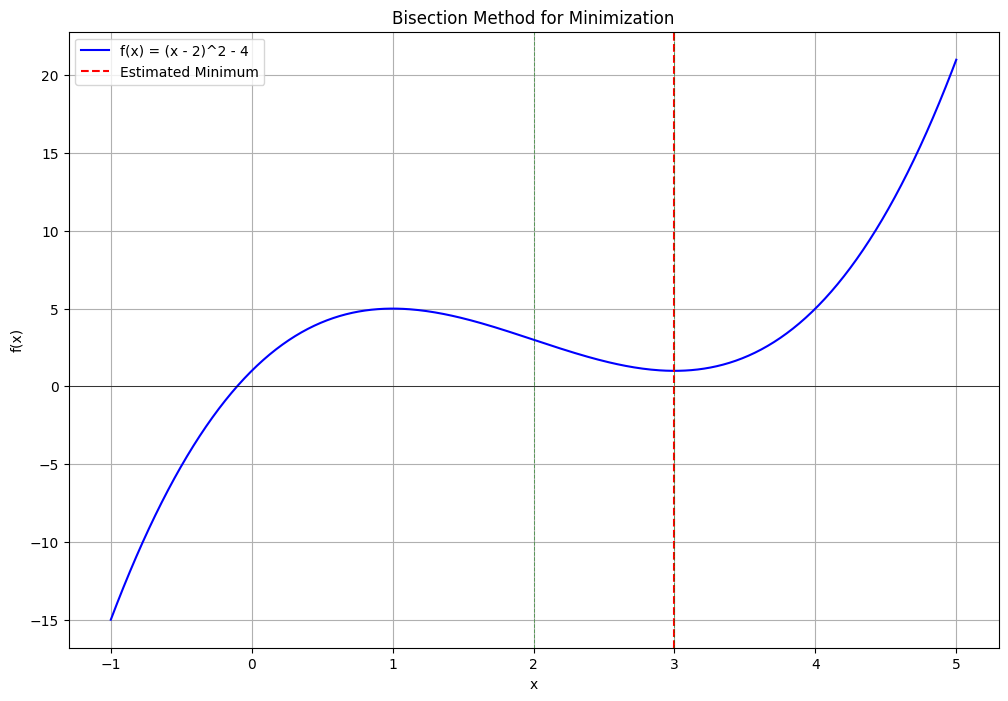

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Função e sua derivada
def f(x):
    return x**3 - 6*x**2 + 9*x + 1

def df(x):
    return 3*x**2 - 12*x + 9

def bisection_method(a, b, epsilon, max_iter=20):
    iterations = []

    for i in range(max_iter):
        z = (a + b) / 2
        df_a = df(a)
        df_b = df(b)
        df_z = df(z)

        # Store the iteration details
        iterations.append({
            'Iteration': i + 1,
            'a': a,
            'b': b,
            'z': z,
            'df(z)': df_z
        })

        if abs(df_z) <= epsilon:
            break

        if df_z < 0:
            a = z
        else:
            b = z

    return z, iterations

# Parameters
a = 0
b = 4
epsilon = 0.01

# Run the bisection method
minimum, iterations = bisection_method(a, b, epsilon)

# Print the results
print(f"Estimated minimum at x = {minimum:.4f}\n")
print("Iteration Results:")
df_iterations = pd.DataFrame(iterations)
print(df_iterations.to_string(index=False))

# Plot the results
x = np.linspace(a - 1, b + 1, 400)
y = f(x)

plt.figure(figsize=(12, 8))
plt.plot(x, y, label='f(x) = (x - 2)^2 - 4', color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(minimum, color='red', linestyle='--', label='Estimated Minimum')

for entry in iterations:
    plt.axvline(entry['z'], color='green', linestyle='--', linewidth=0.7, alpha=0.5)

plt.title('Bisection Method for Minimization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()
